In [1]:
# Python Project 3

# NYPD Crime Data

# The task is to analyze NYPD arrest data
# To do:
## - pick a zip/neighborhood/district as initial comparison point
## - pick a feature/measure/column
## - compare initial point to others

## - include descriptive statistics
## - inlcude one cleaning task or more
## - include one visualization
## - include brief conclusion statement that includes a discussion on bias (no more than 4 sent.)


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [10]:
df = pd.read_csv('C:/Users/shoover/Downloads/NYPD_Arrests_Data__Historic_.csv')

# Note to self: jupyter wants forward slashes!

In [11]:
df.head()

# 19 columns. 5.5m rows!

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


In [12]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498650 entries, 0 to 5498649
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 797.1+ MB


ASSAULT 3                                     460078
MARIJUANA, POSSESSION 4 & 5                   423783
THEFT OF SERVICES, UNCLASSIFIED               303359
CONTROLLED SUBSTANCE, POSSESSION 7            278083
NY STATE LAWS,UNCLASSIFIED VIOLATION          225678
                                               ...  
HIND PROSEC. TERR 2                                1
FAC. SEXUAL OFFENSE W/CONTROLLED SUBSTANCE         1
NYS PROBATION                                      1
LOITERING FOR PROSTITUTION OR                      1
CANNABIS POSSESSION                                1
Name: PD_DESC, Length: 440, dtype: int64


<Axes: title={'center': 'Types of Crimes'}>

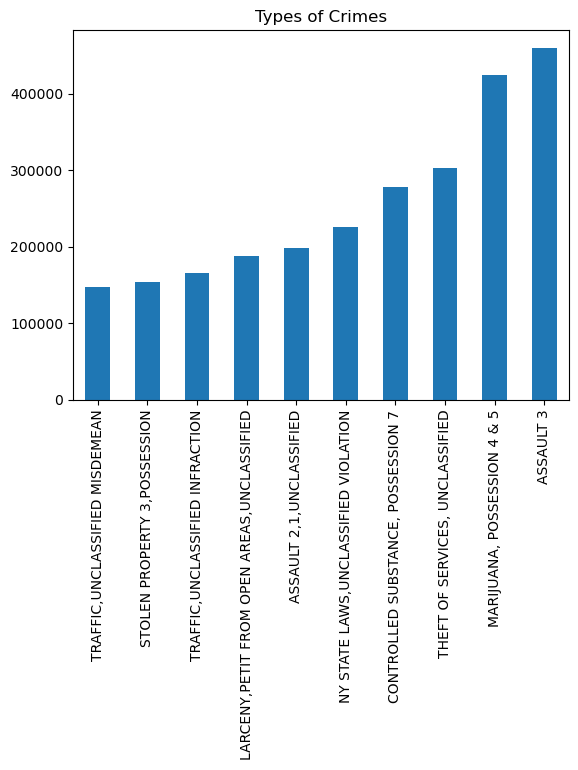

In [13]:
pdcd_freq = df['PD_DESC'].value_counts()
print(pdcd_freq)

# Seems pd 101 has the most arrests
# switched pd_cd for pd_desc and found out thats for Assault 3

df.PD_DESC.value_counts().iloc[:10].sort_values().plot(kind="bar", title = "Types of Crimes")
# Value_counts function both sorts and counts the varaible you select.
# iloc does the top N of values, so in case top 10 pd categories

<Axes: >

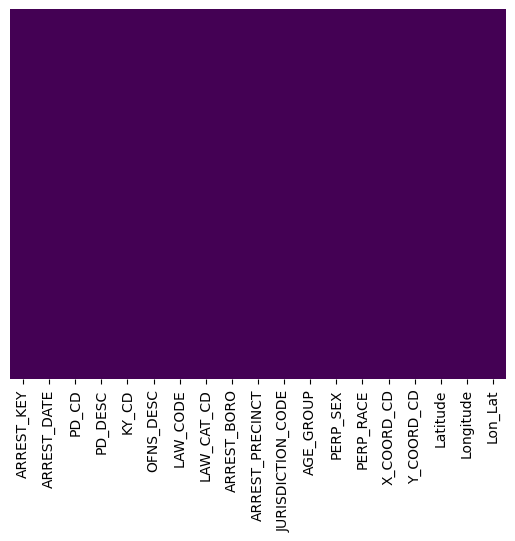

In [11]:
# sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') 
# That did not work

In [14]:
df.isna().sum()

# Law cat cd is most missing and it is a qualitative variable that describes the type of offense as a felony, misdemeanor, 
# or violation.


ARREST_KEY               0
ARREST_DATE              0
PD_CD                  874
PD_DESC               9169
KY_CD                 9739
OFNS_DESC             9169
LAW_CODE               196
LAW_CAT_CD           22001
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

<Axes: title={'center': 'Types of Crimes'}>

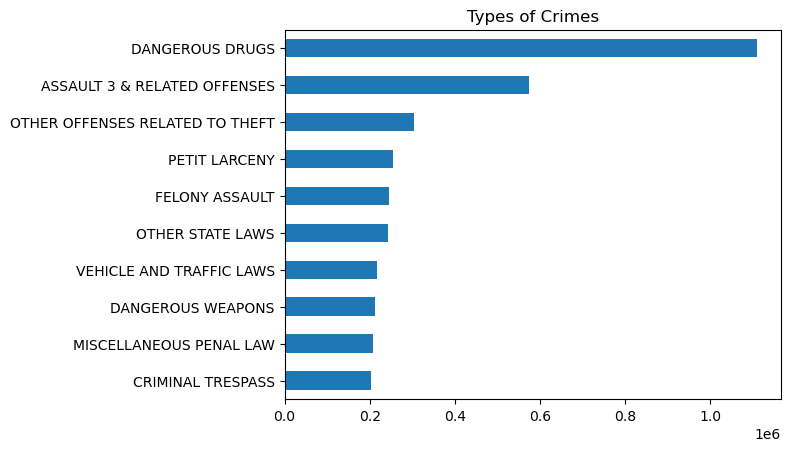

In [15]:
df.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")
# Here, it appears that dangerous drugs is the top type of crimes

C:\Users\shoover\AppData\Local\Temp\ipykernel_18524\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

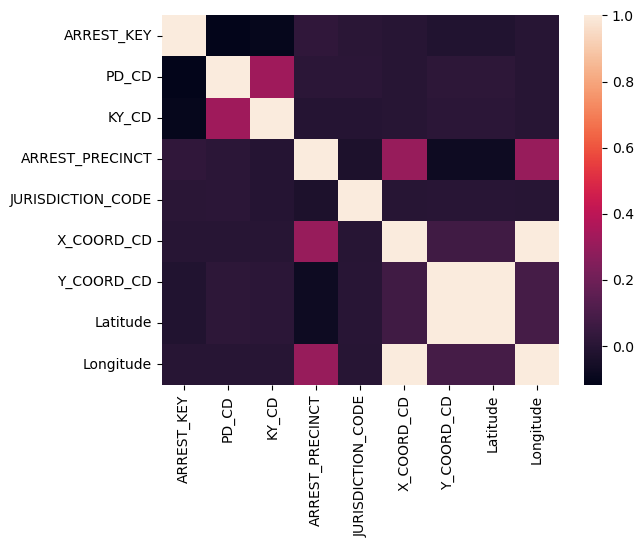

In [36]:
sns.heatmap(df.corr())

([<matplotlib.patches.Wedge at 0x1ce27c64580>,
 [Text(0.7087161597603018, 0.8412617933168073, 'Kings'),
  Text(-0.9342743024262968, 0.5806302849713032, 'Manhattan'),
  Text(-0.5885482389179075, -0.9293067149583231, 'Bronx'),
  Text(0.7494438227522983, -0.8051918756038351, 'Queens'),
  Text(1.0930274493409977, -0.12365676280378969, 'Staten Island')],
 [Text(0.3865724507783464, 0.4588700690818948, '27.7%'),
  Text(-0.5096041649597982, 0.3167074281661653, '26.9%'),
  Text(-0.32102631213704047, -0.5068945717954488, '22.9%'),
  Text(0.40878753968307174, -0.43919556851118274, '19.0%'),
  Text(0.596196790549635, -0.06744914334752164, '3.6%')])

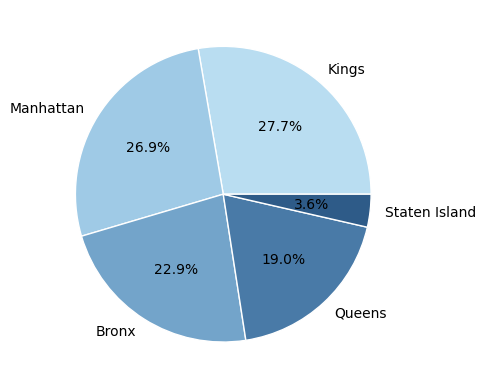

In [16]:
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

df["ARREST_BORO"].replace({"M": "Manhattan", "K": "Kings","B":"Bronx", "S": "Staten Island", "Q": "Queens"}, inplace=True)

plt.pie(df['ARREST_BORO'].value_counts().values, labels=df['ARREST_BORO'].value_counts().index, colors=colors,  
         wedgeprops = {"linewidth": 1, "edgecolor": "white"}, autopct='%.1f%%')

# decided to change M to Manhattan, B to Bronx, K to Kings, etc
# Kings has the most amount of Arrests assuming that arrests are unique rows!

<Axes: title={'center': 'Types of Crimes'}>

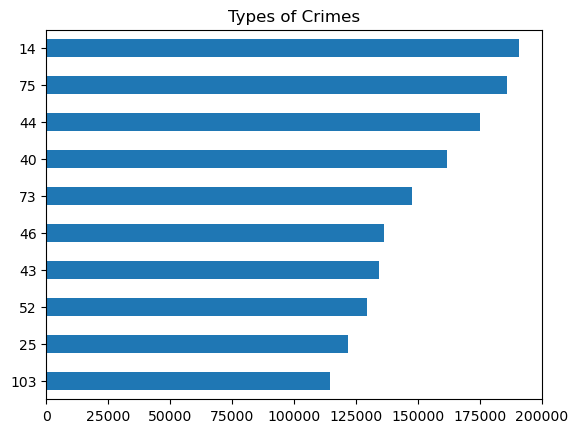

In [17]:
# For this analysis, I want to see how arrest age groups varies by precinct. I also want to check if race distribution
# varies by precinct.

df.ARREST_PRECINCT.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

# Precinct 14 has the most amount of crimes tied to it. Will use this for the analysis

<Axes: title={'center': 'Types of Crimes'}>

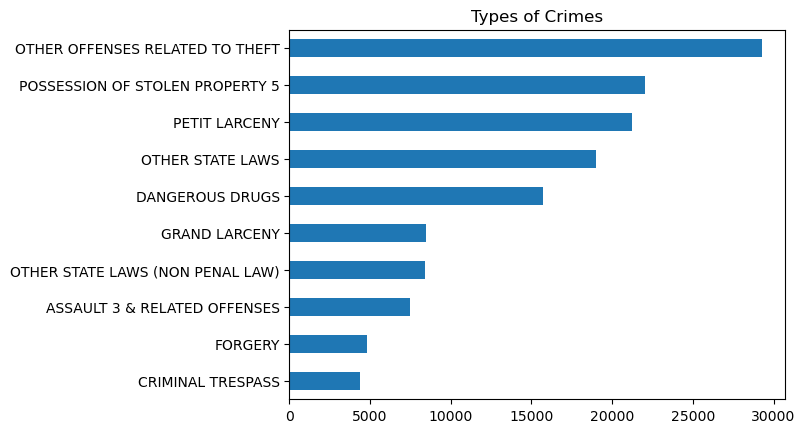

In [18]:
df2=df.loc[df['ARREST_PRECINCT'] == 14]

df2.head()

df2.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")


# Let's focus on Precinct 14. 
# Seems like it has a lot of offenses related to theft.

<Axes: xlabel='AGE_GROUP', ylabel='count'>

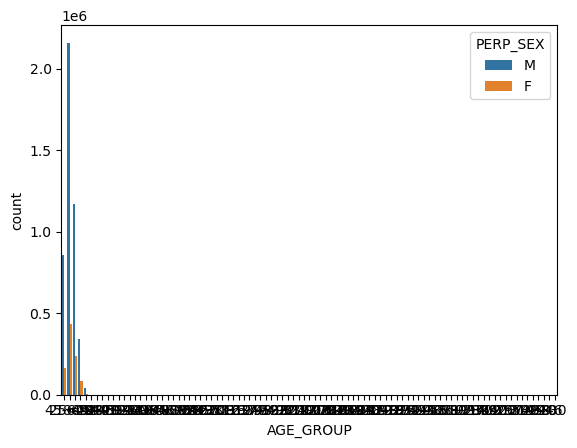

In [19]:
sns.countplot(x='AGE_GROUP', data=df, hue = 'PERP_SEX')

# Here, we see that people around the age of 25-44 are primarily the ones with arrest charges.


([<matplotlib.patches.Wedge at 0x1ce6acddfa0>,
 [Text(-0.013251329784787972, 1.099920179948952, 'BLACK'),
  Text(-0.8305330352968084, -0.7212592302914885, 'WHITE HISPANIC'),
  Text(0.3714524952053201, -1.0353854566323317, 'WHITE'),
  Text(0.9375520607986327, -0.5753226340865072, 'BLACK HISPANIC'),
  Text(1.0671620841945713, -0.26676785049458057, 'ASIAN / PACIFIC ISLANDER'),
  Text(1.097939638474781, -0.06729450397965221, 'UNKNOWN'),
  Text(1.099953051093984, -0.01016294194787378, 'AMERICAN INDIAN/ALASKAN NATIVE'),
  Text(1.0999992265379261, -0.0013044600279804516, 'OTHER')],
 [Text(-0.007227998064429802, 0.5999564617903373, '50.4%'),
  Text(-0.4530180192528045, -0.39341412561353917, '22.0%'),
  Text(0.20261045193017457, -0.5647557036176354, '16.2%'),
  Text(0.5113920331628905, -0.3138123458653675, '5.3%'),
  Text(0.5820884095606752, -0.14550973663340758, '4.4%'),
  Text(0.5988761664407896, -0.03670609307981029, '1.4%'),
  Text(0.5999743915058093, -0.005543422880658425, '0.2%'),
  Text(

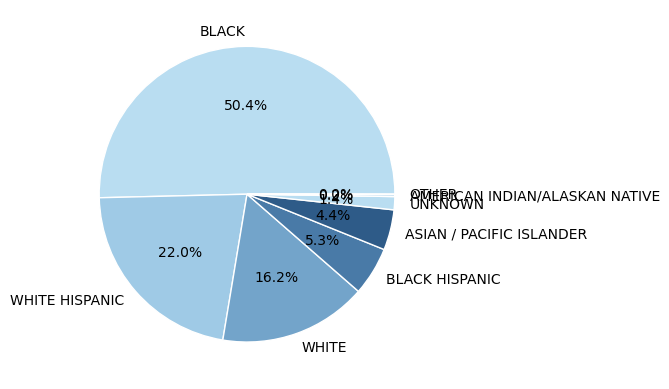

In [20]:
plt.pie(df.loc[df['ARREST_PRECINCT'] == 14]['PERP_RACE'].value_counts().values, labels=df.loc[df['ARREST_PRECINCT'] == 14]['PERP_RACE'].value_counts().index, colors=colors,  
         wedgeprops = {"linewidth": 1, "edgecolor": "white"}, autopct='%.1f%%')

# Here, we see that people around the age of 25-44 are primarily the ones with arrest charges.


([<matplotlib.patches.Wedge at 0x1ce6abd17f0>,
 [Text(-0.6307645909160433, 0.9011859024898895, 'BLACK'),
  Text(0.27271491665063297, -1.0656578129194374, 'WHITE HISPANIC'),
  Text(0.9448989560839033, -0.5631748953846842, 'BLACK HISPANIC'),
  Text(1.06372253398484, -0.28016846841297366, 'WHITE'),
  Text(1.0938278941878272, -0.11636381695623188, 'ASIAN / PACIFIC ISLANDER'),
  Text(1.0993781115343626, -0.036983345970025075, 'UNKNOWN'),
  Text(1.0999627900350737, -0.009047681374606233, 'AMERICAN INDIAN/ALASKAN NATIVE'),
  Text(1.09999991703978, -0.00042721479018616556, 'OTHER')],
 [Text(-0.34405341322693267, 0.49155594681266696, '69.4%'),
  Text(0.14875359090034523, -0.5812678979560567, '19.1%'),
  Text(0.51539943059122, -0.30718630657346413, '5.8%'),
  Text(0.5802122912644581, -0.1528191645888947, '3.1%'),
  Text(0.5966333968297239, -0.06347117288521738, '1.7%'),
  Text(0.5996607881096523, -0.02017273416546822, '0.6%'),
  Text(0.5999797036554947, -0.0049350989316034, '0.2%'),
  Text(0.599

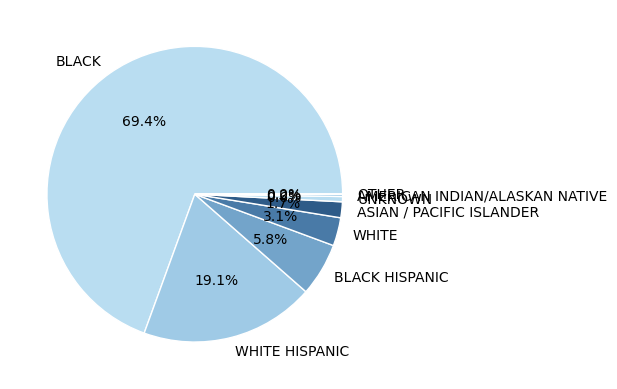

In [21]:
plt.pie(df.loc[df['ARREST_PRECINCT'] == 75]['PERP_RACE'].value_counts().values, labels=df.loc[df['ARREST_PRECINCT'] == 75]['PERP_RACE'].value_counts().index, colors=colors,  
         wedgeprops = {"linewidth": 1, "edgecolor": "white"}, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x1ce6acfa760>,
 [Text(0.09490742189433185, 1.0958980706568342, 'BLACK'),
  Text(-0.736907617958956, -0.8166805756194141, 'WHITE HISPANIC'),
  Text(0.7860150503769917, -0.7695325467976356, 'BLACK HISPANIC'),
  Text(1.0836160887135733, -0.18914590209966875, 'WHITE'),
  Text(1.097790979077128, -0.06967758790946035, 'UNKNOWN'),
  Text(1.0997668139553813, -0.0226485081722828, 'ASIAN / PACIFIC ISLANDER'),
  Text(1.0999942129666302, -0.003568114337321268, 'AMERICAN INDIAN/ALASKAN NATIVE'),
  Text(1.0999999427370142, -0.0003549345931495605, 'OTHER')],
 [Text(0.05176768466963555, 0.5977625839946368, '47.3%'),
  Text(-0.40194960979579414, -0.445462132156044, '32.1%'),
  Text(0.4287354820238136, -0.41974502552598303, '16.6%'),
  Text(0.5910633211164944, -0.10317049205436477, '2.6%'),
  Text(0.5987950794966153, -0.038005957041523826, '0.9%'),
  Text(0.5998728076120261, -0.012353731730336071, '0.5%'),
  Text(0.5999968434363436, -0.0019462441839934188, '0.1%'),
  Text

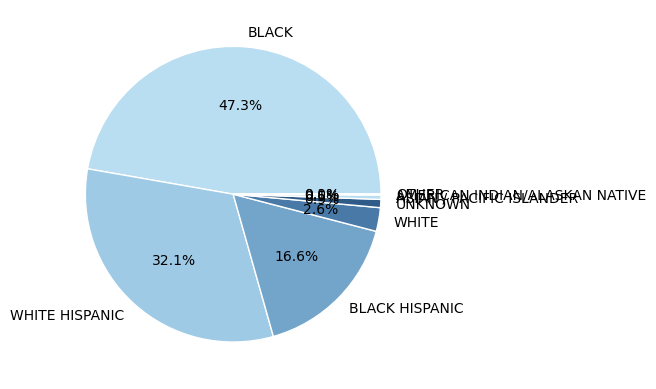

In [23]:
plt.pie(df.loc[df['ARREST_PRECINCT'] == 44]['PERP_RACE'].value_counts().values, labels=df.loc[df['ARREST_PRECINCT'] == 44]['PERP_RACE'].value_counts().index, colors=colors,  
         wedgeprops = {"linewidth": 1, "edgecolor": "white"}, autopct='%.1f%%')

In [ ]:
# Here, to conclude, I did a lot of cleaning and brief visualizations to understand the dataset a bit more. In the end, I choose
# to compare the race of the offenders at the top precincts by offense count. I found that all 3 of the top precincts
# the majority of the offenders were black, and then white hispanic. It was interesting to see black hispanic pop up as 
# a top race/ethnicity because it's not one of the core options you see in more administrative data.

# Bias could be present in the data if this dataset was only limited to certain zipcodes/boroughs. It could also be due to 
# poor data completion in various precincts where they don't officially book offenders or do not fill out all of the specified fields.
# Also, bias could be present in this data, specifically for race, because likely the officer is filling out the form for booking
# instead of the offender who may respond differently to the same question.